# 모델 성능 평가

### 분류 모델의 평가 지표
: 예측 대상이 범주형 데이터 경우
- 정확도(Accuracy)
- 재현율(Recall)
- 정밀도(Precision)
- F1 measure
- G measure
- ROC curve
- AUC

### 회귀 모델의 평가 지표
: 예측 대상이 수치 데이터인 경우
- MSE(Mean Square Error)
- RMSE(Root Mean Square Error)
- MAE(Mean Absolute Error)
- MAPE(Mean Absolute Percentage Error)
- $ R^2 $

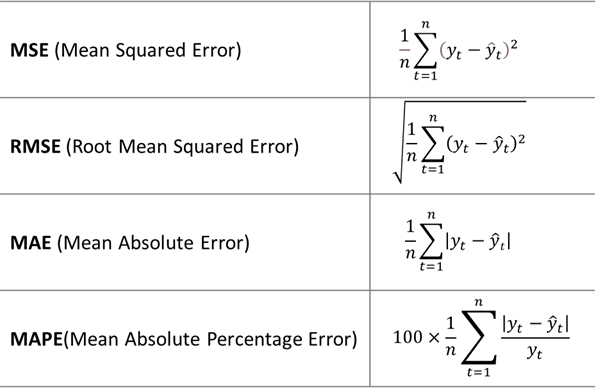


# 분류 모델의 성능 평가 지표

## Accuracy(정확도)

- 실제 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표

- $ 정확도(Accuracy) =  \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수} $

### 정확도 문제 예
1. 타이타닉 생존자 예측
2. MNIST 데이터 세트

In [1]:
import numpy as np

### 1. 타이타닉 생존자 예측

- 생존자 예측 Classifier 정의 : BaseEstimator 상속 받음
- 아무런 학습을 하지 않고 성별에 따라 생존자를 예측

In [2]:
# 아무런 학습을 하지 않고 성별에 따라 생존자를 예측하는 
# 단순한 Classifier 생성
# BaseEstimator 상속 받음

from sklearn.base import BaseEstimator

class myClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 0: # 여성
                pred[i] = 1
            else : 
                pred[i] = 0
        return pred

**MyClassifier를 이용해 타이타닉 생존자 예측 수행**

In [3]:
# 데이터 전처리
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    # Age, Cabin, Embarked
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df
# 불필요한 속성 제거
def drop_features(df):
    # PassengerId, Name, Ticket 제거
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 
def format_features(df):
    # Cabin의 첫문자 추출
    df['Cabin'] = df['Cabin'].str[:1]
    # Cabin, Sex, Embarked 를 LabelEncoding
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_dataFrame(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
import pandas as pd
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titan_df = pd.read_csv('datasets/titanic/train.csv')
transform_dataFrame(titan_df)


# Target dataset
y = titan_df['Survived']

# Input dataset : 'Survived' 칼럼 제외
X = titan_df.drop('Survived', axis=1)

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/ 테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 위에서 생성한 myClassifier를 이용하여 학습/예측/평가 수행
my_clf = myClassifier()
my_clf.fit(X_train, y_train)
pred = my_clf.predict(X_test)

In [6]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [7]:
pred[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [8]:
# 정확도 계산
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred)
print(acc)

0.7821229050279329


In [9]:
titan = pd.read_csv('datasets/titanic/train.csv')
titan['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

### 2. MNIST 데이터 세트
* 사이킷런의 load_digits() API를 통해 MNIST 데이터 세트 제공

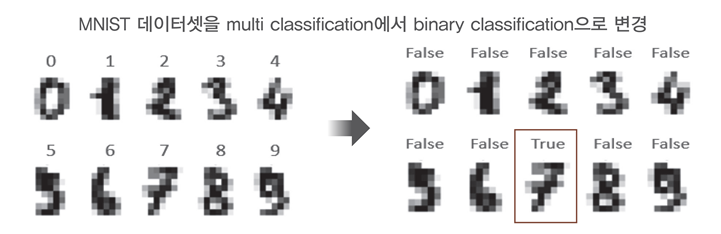

**이진 분류 문제로 변환**

* 불균형한 데이터 세트로 변형
* 레이블 값이 7인 것만 True, 나머지 값은 모두 False

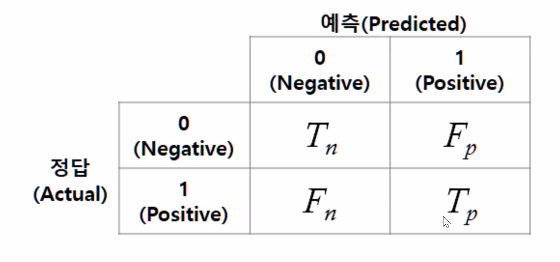

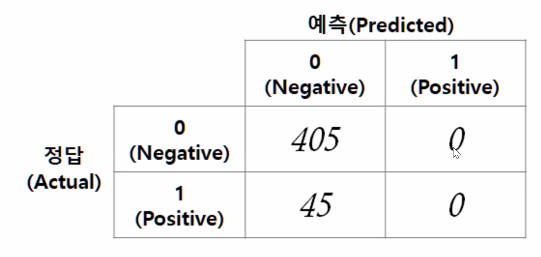

**이진 분류 문제로 변환**

    
**입력되는 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해**


### 정확도 평가 지표의 맹점

- 0으로 예측하는 classifier 정의

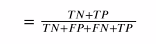

In [10]:
# 모듈 임포트

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

In [11]:
# 분류모델 정의
class MyNumClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

**digit 데이터 로드 및 확인**

In [12]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [13]:
# DESCR의 설명
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [14]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
digits.data.shape

(1797, 64)

**7인 데이터 확인**

In [17]:
digits.target == 7

array([False, False, False, ..., False, False, False])

**7인 데이터는 1, 그외 데이터는 0으로 변환**

In [18]:
y = (digits.target == 7).astype(int)

In [19]:
y

array([0, 0, 0, ..., 0, 0, 0])

**학습 / 테스트 데이터 세트로 분리 (default = 0.25))**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, test_size=0.25)

In [21]:
X_train

array([[0., 0., 3., ..., 5., 0., 0.],
       [0., 0., 4., ..., 3., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 5., ..., 0., 0., 0.],
       [0., 1., 8., ..., 4., 0., 0.],
       [0., 0., 0., ..., 4., 0., 0.]])

In [22]:
X_test

array([[ 0.,  0.,  9., ...,  4.,  0.,  0.],
       [ 0.,  0.,  5., ...,  8.,  0.,  0.],
       [ 0.,  1., 12., ..., 13.,  1.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.]])

**불균형한 레이블 데이터 분포도 확인**

In [23]:
y_test.shape

(450,)

In [24]:
pd.Series(y_test).value_counts()

0    408
1     42
dtype: int64

In [25]:
fake_clf = MyNumClassifier()
fake_clf.fit(X_train, y_train)
pred = fake_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print('정확도', acc)

정확도 0.9066666666666666


# Confusion Matrix (오차 행렬)

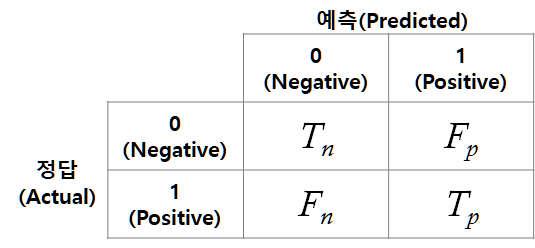

In [26]:
# MNISt의 fakepred
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[408,   0],
       [ 42,   0]], dtype=int64)

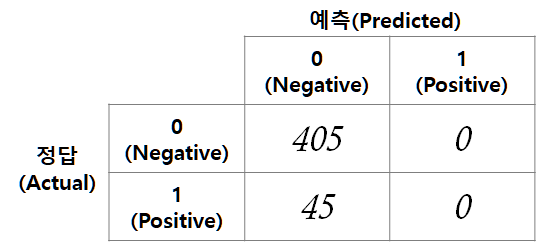

**TN, FP, FN, TP 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보 제공**
- 이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Predision), 재현율(Recall) 값을 알 수 있음

### 오차행렬 상에서 정확도

* 정확도(Accuracy) = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수

    $ = \frac{TN + TP}{ TN + FP + FN + TP }$

# 정밀도(Precision)와 재현율(Recall)

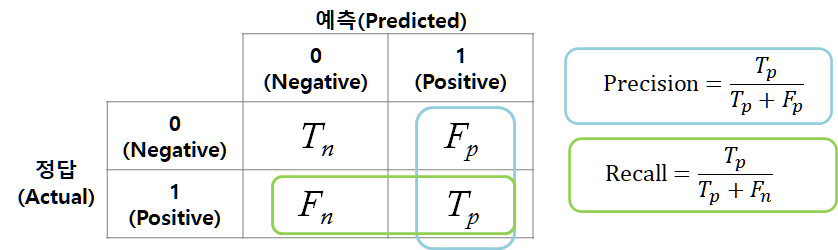

### 정밀도 : TP / (FP + TP)
* Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 
* **양성 예측도**라고도 불림

### 재현율 : TP / (FN + TP)
* 실제값이 Positive인 대상 중 예측과 실제 값이 Positive로 일치한 데이터의 비율
* **민감도(Sensitivity) 또는 TPR(True Positive Rate)**이라고도 불림

### MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

- 타이타닉 데이터를 로지스틱 회귀로 분류 수행

In [27]:
class MyNumClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, test_size=0.25)
fake_clf = MyNumClassifier()
fake_clf.fit(X_train, y_train)
pred = fake_clf.predict(X_test)

In [28]:
from sklearn.metrics import precision_score, recall_score

print('정밀도', precision_score(y_test, pred))
print('정밀도', recall_score(y_test, pred))

정밀도 0.0
정밀도 0.0


C:\Users\82103\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수

In [29]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f}, 정렬도 : {1:.3f}, 재현률{2:.3f}'.format(accuracy, precision, recall))

**앞의 타이타닉 데이터 세트 전처리 작업 내**

In [30]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    # Age, Cabin, Embarked
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df
# 불필요한 속성 제거
def drop_features(df):
    # PassengerId, Name, Ticket 제거
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 
def format_features(df):
    # Cabin의 첫문자 추출
    df['Cabin'] = df['Cabin'].str[:1]
    # Cabin, Sex, Embarked 를 LabelEncoding
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [31]:
# 로지스틱 회구 LogisticRegression
# 타이타닉 생존자 예측하고

# 모듈 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# 데이터 로드 : 데이터 프레임으로 저장
titanic_df = pd.read_csv('datasets/titanic/train.csv')
titanic_df = transform_features(titanic_df)

y = titanic_df['Survived']
X = titanic_df.drop('Survived', axis=1)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 로지스틱 회귀 객체 생성
lr_clf = LogisticRegression()

# 학습
lr_clf.fit(X_train, y_train)

# 평가
pred = lr_clf.predict(X_test)

# 성능 결과 출력
get_clf_eval(y_test, pred)

오차행렬
[[113  18]
 [ 25  67]]
정확도 : 0.807, 정렬도 : 0.788, 재현률0.728


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# 데이터 로드 : 데이터 프레임으로 저장
titanic_df = pd.read_csv('datasets/titanic/train.csv')
titanic_df = transform_features(titanic_df)

y = titanic_df['Survived']
X = titanic_df.drop('Survived', axis=1)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y)

# myClassifier() 객체 생성
my_clf = myClassifier()

# 학습
my_clf.fit(X_train, y_train)

# 평가
pred = my_clf.predict(X_test)

# 성능 결과 출력
get_clf_eval(y_test, pred)

오차행렬
[[116  25]
 [ 25  57]]
정확도 : 0.776, 정렬도 : 0.695, 재현률0.695


## Precision/Recall Trade-off

**정밀도 / 재현율 트레이드 오프(Trade-off)**
* 정밀도와 재현율은 상호 보완적인 평가 지표로서 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지는데 이를 정밀도/재현율의 트레이드 오프라고 함

### predict_proba( ) 메소드

타이타닉 생존자 데이터를 학습한 LogisticRegression 객체에서 predict_proba() 메서드를 수행한 뒤 반환 값 확인하고 predict() 메서르와 결과 비교 앞 예제에 이어서 코드 작성

In [33]:
pred = my_clf.predict(X_test)
pred[:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [34]:
# predict_proba()
predict_proba = lr_clf.predict_proba(X_test)
predict_proba[:5]

array([[0.2356954 , 0.7643046 ],
       [0.55130119, 0.44869881],
       [0.85316557, 0.14683443],
       [0.86252693, 0.13747307],
       [0.9382413 , 0.0617587 ]])

In [35]:
# 예측 확률array와 예측 결과값 array를 
pred_proba_result = np.concatenate([predict_proba, pred.reshape(-1, 1)], axis=1)
pred_proba_result

array([[0.2356954 , 0.7643046 , 1.        ],
       [0.55130119, 0.44869881, 1.        ],
       [0.85316557, 0.14683443, 0.        ],
       [0.86252693, 0.13747307, 0.        ],
       [0.9382413 , 0.0617587 , 0.        ],
       [0.11999325, 0.88000675, 1.        ],
       [0.93114361, 0.06885639, 0.        ],
       [0.9237599 , 0.0762401 , 0.        ],
       [0.86662302, 0.13337698, 0.        ],
       [0.67139176, 0.32860824, 0.        ],
       [0.23667229, 0.76332771, 0.        ],
       [0.86672367, 0.13327633, 0.        ],
       [0.92174529, 0.07825471, 0.        ],
       [0.90038192, 0.09961808, 0.        ],
       [0.80965871, 0.19034129, 0.        ],
       [0.02972513, 0.97027487, 1.        ],
       [0.09722155, 0.90277845, 1.        ],
       [0.3362911 , 0.6637089 , 1.        ],
       [0.79202676, 0.20797324, 0.        ],
       [0.87099315, 0.12900685, 0.        ],
       [0.69134661, 0.30865339, 0.        ],
       [0.85393046, 0.14606954, 0.        ],
       [0.

### Binarizer 클래스 활용

분류 결정 임계값을 조절

In [36]:
from sklearn.preprocessing import Binarizer

X = [[0.5, -1, 2],
    [2, 0, -2],
    [0, 1.3, 1.5]]

binar = Binarizer(threshold=1.5)

In [37]:
binar.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

In [38]:
c_thres = 0.5

In [39]:
# predict_proba() 반환값([0확률, 1확률])의 두번째 컬럼
pred_proba1 = predict_proba[:, 1].reshape(-1,1)
bina = Binarizer(threshold=c_thres).fit(pred_proba1)
bina

Binarizer(threshold=0.5)

In [40]:
result = bina.transform(pred_proba1)
result

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],

In [41]:
get_clf_eval(y_test, result)

오차행렬
[[117  24]
 [ 22  60]]
정확도 : 0.794, 정렬도 : 0.714, 재현률0.732


**분류 결정 임계값을 0.4로 변경**

In [42]:
c_thres = 0.4

In [43]:
pred_proba1 = predict_proba[:, 1].reshape(-1,1)
bina = Binarizer(threshold=c_thres).fit(pred_proba1)
bina

Binarizer(threshold=0.4)

In [44]:
result = bina.transform(pred_proba1)
result

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],

In [45]:
get_clf_eval(y_test, result)

오차행렬
[[110  31]
 [ 18  64]]
정확도 : 0.780, 정렬도 : 0.674, 재현률0.780


**여러개의 분류 결정 임곗값을 변경하면서  Binarizer를 이용하여 예측값 변환**

In [46]:
thresholds = [0.3, 0.45, 0.6, 0.75, 0.9]

def get_eval_by_thresholds(y_test, pred_proba1, thresholds):
    for c in thresholds:
        bina = Binarizer(threshold=c)
        bina.fit(pred_proba1)
        result = bina.transform(pred_proba1)
        get_clf_eval(y_test, result)
get_eval_by_thresholds(y_test, pred_proba1, thresholds)


오차행렬
[[104  37]
 [ 12  70]]
정확도 : 0.780, 정렬도 : 0.654, 재현률0.854
오차행렬
[[114  27]
 [ 21  61]]
정확도 : 0.785, 정렬도 : 0.693, 재현률0.744
오차행렬
[[128  13]
 [ 28  54]]
정확도 : 0.816, 정렬도 : 0.806, 재현률0.659
오차행렬
[[138   3]
 [ 48  34]]
정확도 : 0.771, 정렬도 : 0.919, 재현률0.415
오차행렬
[[140   1]
 [ 65  17]]
정확도 : 0.704, 정렬도 : 0.944, 재현률0.207


정밀도는 좋아지고 재현률은 떨어진다

### 임곗값에 따른 정밀도-재현율 값 추출

**precision_recall_curve( 실제값, 레이블 값이 1일 때의 예측 확률값)**
- 정밀도, 재현율, 임계값을 ndarray로 반환
- 임계값 : 일반적으로 0.11~0.95 범위
- 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용

### 예제

In [47]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
prped_proba1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba1)

In [48]:
print('정밀도', precisions)
print('재현율', recalls)
print('thresholds', thresholds)

정밀도 [0.39423077 0.39130435 0.39320388 0.39512195 0.39705882 0.39901478
 0.4009901  0.40298507 0.405      0.40703518 0.40909091 0.41116751
 0.41326531 0.41538462 0.41752577 0.41968912 0.421875   0.42408377
 0.42631579 0.42857143 0.43085106 0.43315508 0.43783784 0.44021739
 0.44262295 0.43956044 0.44198895 0.44444444 0.45714286 0.46783626
 0.46470588 0.46745562 0.4702381  0.47305389 0.47878788 0.48170732
 0.48466258 0.48765432 0.49068323 0.49375    0.49685535 0.5
 0.50318471 0.50641026 0.50967742 0.51298701 0.51633987 0.51973684
 0.52317881 0.52666667 0.53020134 0.53378378 0.53061224 0.53424658
 0.53793103 0.53472222 0.53846154 0.54225352 0.54609929 0.55
 0.55395683 0.55797101 0.5620438  0.57037037 0.57462687 0.57142857
 0.57575758 0.58015267 0.58461538 0.58139535 0.5952381  0.6
 0.59677419 0.60162602 0.60655738 0.61157025 0.61666667 0.62711864
 0.63247863 0.63793103 0.64347826 0.64912281 0.6460177  0.65178571
 0.64864865 0.65454545 0.66055046 0.65740741 0.65420561 0.6509434
 0.64761905 

In [49]:
precisions.shape

(194,)

In [50]:
thr_idx = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_idx)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_idx], 2))



샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150 165 180]
샘플용 10개의 임계값: [0.06 0.09 0.1  0.13 0.15 0.22 0.33 0.44 0.57 0.64 0.7  0.81 0.93]


### 임곗값의 변경에 따른 정밀도-재현율 변화 곡선

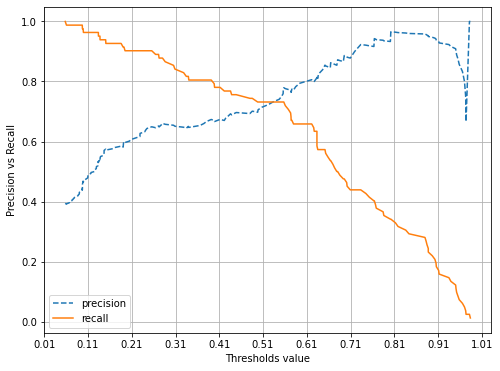

In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# y_test : 실제 값 
# pred_proba1 : 예측 확률 값

def precision_result_curve_plot(y_test, pred_proba1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba1)
    plt.figure(figsize=(8,6))
    thresholds_n = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_n], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_n], label = 'recall')
    
    start, end = plt.xlim()
    # plt.xticks(np.round(np.arange(start, end, 0.1), 2))에서 2는 소수점 이하 자리 수
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Thresholds value')
    plt.ylabel('Precision vs Recall')
    plt.legend() # 범례
    plt.grid() # 선 그리는 그리드
    plt.show()
    
pred_proba1 = lr_clf.predict_proba(X_test)[:, 1]
precision_result_curve_plot(y_test, pred_proba1)

# F1 Score

### F1 Score
- 정밀도와 재현율의 조화평균

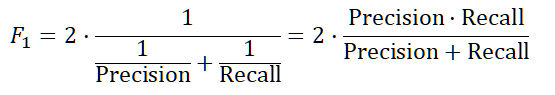

### 예 : 두 예측 모델 비교  
A 예측 모델
- 정밀도 : 0.9
- 재현율 : 0.1 (극단적 차이)
- F1 스코어 : 0.18

B 예측 모델
- 정밀도 : 0.5
- 재현율 : 0.5 (큰 차이 없음)
- F1 스코어 : 0.5 

B모델의 FI 스코어가 A모델에 비해 매우 우수

In [52]:
# f1_score()
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('f1', f1)

f1 0.6951219512195121


### 타이타닉 생존자 예측에서 F1 스코어
- 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기
- 임계값 0.4~0.6별로 정확도, 정밀도, 재현율, F1 스코어 확인

In [53]:
def get_clf_eval(y_test, pred):
    # confusion_matrix
    confusion = confusion_matrix(y_test, pred)
    # accuaccuracy_score
    acc = accuracy_score(y_test, pred)
    # precision
    precision = precision_score(y_test, pred)
    # recall_score
    recall = recall_score(y_test, pred)
    # f1_score
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.3f}, 정밀도:{1: .3f}, 재현율:{2:.3f}, f1:{3: .3f}'.format(acc, precision, recall, f1))

In [54]:
get_clf_eval(y_test, pred)

오차행렬
[[116  25]
 [ 25  57]]
정확도:0.776, 정밀도: 0.695, 재현율:0.695, f1: 0.695


In [55]:
thres= [0.3, 0.45, 0.6, 0.75, 0.9]

pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_thresholds(y_test, pred_proba[:,1].reshape(-1,1), thres)

오차행렬
[[104  37]
 [ 12  70]]
정확도:0.780, 정밀도: 0.654, 재현율:0.854, f1: 0.741
오차행렬
[[114  27]
 [ 21  61]]
정확도:0.785, 정밀도: 0.693, 재현율:0.744, f1: 0.718
오차행렬
[[128  13]
 [ 28  54]]
정확도:0.816, 정밀도: 0.806, 재현율:0.659, f1: 0.725
오차행렬
[[138   3]
 [ 48  34]]
정확도:0.771, 정밀도: 0.919, 재현율:0.415, f1: 0.571
오차행렬
[[140   1]
 [ 65  17]]
정확도:0.704, 정밀도: 0.944, 재현율:0.207, f1: 0.340


# G measure

- 정밀도와 재현율의 기하평균

- $ G = \sqrt{Precision × Recall}$

In [56]:
def get_clf_eval(y_test, pred):
    # measure 추가
    pass

# ROC Curve와 AUC

### ROC(Reciver Operating Characteristic)

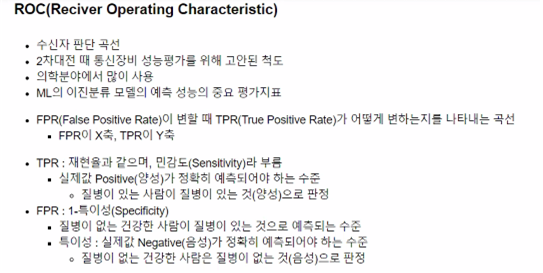

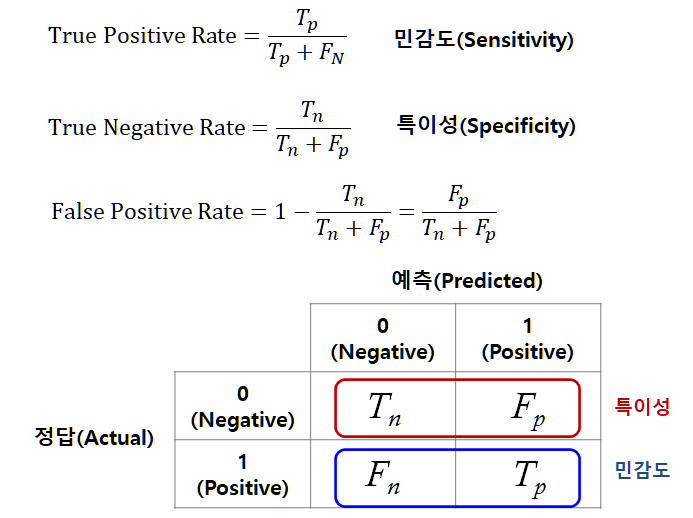

https://hsm-edu.tistory.com/1033

### AUC(Area Under the Curve)
- ROC 곡선 아래 면적
- 대각선의 직선에 대응되면 AUC는 0.5
- 1에 가까울수록 좋은 수치
- FPR이 작을 때 얼마나 큰 TPR을 얻는지에 따라 결정

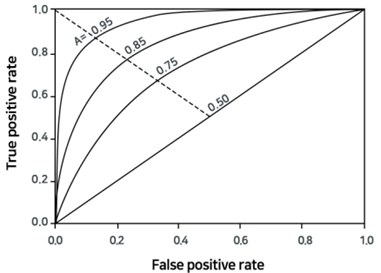

In [57]:
from sklearn.metrics import roc_curve

pred_proba1 = lr_clf.predict_proba(X_test)[:,1]

# 3가지 값 출력 
fprs, tprs, thresholds = roc_curve(y_test, pred_proba1)

idx = np.arange(1, thresholds.shape[0], 5)
print('thresholds:', np.round(thresholds[idx], 3))
print('TPR:', np.round(tprs[idx], 3))
print('FPR:', np.round(fprs[idx], 3))

thresholds: [0.984 0.764 0.694 0.652 0.627 0.557 0.438 0.392 0.272 0.229 0.186 0.137
 0.104 0.097 0.058]
TPR: [0.012 0.402 0.476 0.573 0.634 0.732 0.756 0.805 0.878 0.902 0.927 0.939
 0.963 0.976 1.   ]
FPR: [0.    0.014 0.043 0.057 0.092 0.121 0.199 0.227 0.277 0.326 0.383 0.475
 0.624 0.723 0.894]


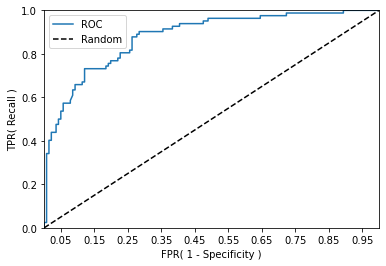

In [58]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs, tprs, label='ROC')
    
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

pred_proba1 = lr_clf.predict_proba(X_test)[:,1]
roc_curve_plot(y_test, pred_proba1 )


In [59]:
# 타이타닉 생존자 예측 로지스틱 회귀 모델의 ROC AUC 값 확인
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, pred_proba1)
print('roc auc값', roc_auc)

roc auc값 0.8794326241134751


In [60]:
# getclf_eval() 변경
# roc-auc 추가 : 예측 확률값을 기반으로 계산되므로
# 매개변수 pred_priba = None 추가

def get_clf_eval(y_test, pred, pred_proba1):
    # confusion_matrix
    confusion = confusion_matrix(y_test, pred)
    # accuaccuracy_score
    acc = accuracy_score(y_test, pred)
    # precision
    precision = precision_score(y_test, pred)
    # recall_score
    recall = recall_score(y_test, pred)
    # f1_score
    f1 = f1_score(y_test, pred)
    # roc-auc
    roc_auc = roc_auc_score(y_test, pred_proba1)
    
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.3f}, 정밀도:{1: .3f}, 재현율:{2:.3f}, f1:{3: .3f}, roc_auc: {4:.3f}'.format(acc, precision, recall, f1, roc_auc))
    

In [62]:
get_clf_eval(y_test, pred, pred_proba1)

오차행렬
[[116  25]
 [ 25  57]]
정확도:0.776, 정밀도: 0.695, 재현율:0.695, f1: 0.695, roc_auc: 0.879
